## Imports

In [1]:
# Imports
# --------
import logging
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import arus


## Turn on logging information

In [2]:
# Turn on logging information
# ---------------------------
arus.dev.set_default_logging()


## Get the test mhealth data files

In [3]:
# Get the test mhealth data files
# -------------------------------

spades_lab = arus.dataset.load_dataset('spades_lab')
sensor_files = spades_lab['subjects']['SPADES_22']['sensors']['DA']


## Setup stream

In [4]:
# Setup stream
# --------------
window_size = 12.8
generator = arus.generator.MhealthSensorFileGenerator(
    *sensor_files, buffer_size=1800)
segmentor = arus.segmentor.SlidingWindowSegmentor(window_size=window_size)

stream = arus.Stream(generator, segmentor,
                     name='mhealth-stream', scheduler='thread')


## Start stream and read in data

In [5]:
# Start stream and read in data
# -----------------------------
stream.start()
chunk_sizes = []
for data, st, et, _, _, name in stream.generate():
    print("{},{},{}".format(
        st, et, data.shape[0]))
    chunk_sizes.append(data.shape[0])


-09 09:44:49.800000,1024
2016-02-09 09:44:49.800000,2016-02-09 09:45:02.600000,1024
2016-02-09 09:45:02.600000,2016-02-09 09:45:15.400000,1024
2016-02-09 09:45:15.400000,2016-02-09 09:45:28.200000,1024
2016-02-09 09:45:28.200000,2016-02-09 09:45:41,1024
2016-02-09 09:45:41,2016-02-09 09:45:53.800000,1024
2016-02-09 09:45:53.800000,2016-02-09 09:46:06.600000,1024
2016-02-09 09:46:06.600000,2016-02-09 09:46:19.400000,1024
2016-02-09 09:46:19.400000,2016-02-09 09:46:32.200000,1024
2016-02-09 09:46:32.200000,2016-02-09 09:46:45,1024
2016-02-09 09:46:45,2016-02-09 09:46:57.800000,1024
2016-02-09 09:46:57.800000,2016-02-09 09:47:10.600000,1024
2016-02-09 09:47:10.600000,2016-02-09 09:47:23.400000,1024
2016-02-09 09:47:23.400000,2016-02-09 09:47:36.200000,1024
2016-02-09 09:47:36.200000,2016-02-09 09:47:49,1024
2016-02-09 09:47:49,2016-02-09 09:48:01.800000,1024
2016-02-09 09:48:01.800000,2016-02-09 09:48:14.600000,1024
2016-02-09 09:48:14.600000,2016-02-09 09:48:27.400000,1024
2016-02-09 09:

## Stop stream

In [6]:
# Stop stream
# ------------
stream.stop()


[INFO]2020-03-03 21:25:40,869 <P14268-MainThread> Stream is stopping.
[INFO]2020-03-03 21:25:40,869 <P14268-MainThread> Segmentor thread stopped.
[INFO]2020-03-03 21:25:40,970 <P14268-MainThread> Generator thread stopped.
[INFO]2020-03-03 21:25:40,971 <P14268-MainThread> Stream stopped.


## Plot the stats of the received data

The plot shows there are two places where the sampling rate of the data drops. This is because the data files loaded have missing data at those moments. The test data is manipulated to include missing moments for test purpose.

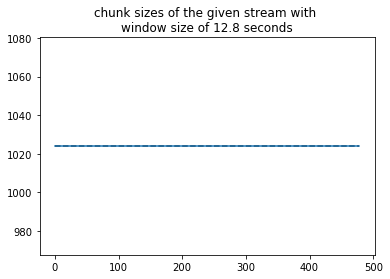

In [8]:
# Plot the stats of the received data
# ------------------------------------
#
# The plot shows there are two places where the sampling rate of the data drops. This is because the data files loaded have missing data at those moments. The test data is manipulated to include missing moments for test purpose.
pd.Series(chunk_sizes).plot(
    title='chunk sizes of the given stream with \nwindow size of ' + str(window_size) + ' seconds')
fig = plt.hlines(y=80 * window_size,
                 xmin=0,
                 xmax=len(chunk_sizes),
                 linestyles='dashed')